##Introducción##
**Mode S**

Es el protocolo utilizado por los transponders (se denomina transponder a un transmisor y receptor de radio frecuencia) de aviones comerciales modernos. 
Un avión equipado con un transponder Mode S contesta a la interrogación de un radar ya sea de tierra o de otro avión.

**Automatic Dependent Surveillance-Broadcast (ADS-B)**
 
Es una tecnología de vigilancia en la que un avión determina su posición y la emite periódicamente, lo que permite realizar su seguimiento. La información puede ser recibida por las estaciones terrestres de control de tráfico aéreo. Puede reemplazar a los sistemas anteriores basados en un radar secundario que contesta a una señal recibida desde tierra. Este sistema no necesita recibir una señal desde tierra para emitir. La señal con la posición enviada también  puede ser recibida por otras aeronaves para proporcionar conocimiento de la situación y permitir la auto-separación.

El ADS-B es un elemento de última generación de sistemas de transporte aéreo de los Estados Unidos (NextGen) y de la Single European Sky ATM Research (SESAR). Los equipos ADS-B actualmente son obligatorios en partes del espacio aéreo de Australia, en Estados Unidos una parte de los aviones lo utilizan y el equipo es obligatorio para algunos aviones en Europa desde 2020.

El protocolo ADS-B utiliza el modo “Extended Squitter” (como veremos más adelante esto refiere a un paquete más largo que el normal)  del protocolo Mode-S. Este protocolo es:
Automatic: no requiere de la intervención del piloto.
Dependent: depende del altímetro, GPS, y otros instrumentos del avión para brindar información.
Surveillance: provee información actual acerca del avión que transmite la información. 
Broadcast: es en un sentido, el avión lo envía a todos los receptores en su rango de alcance.

Un avión equipado con ADS-B transmite su posición, velocidad, número de vuelo y otra información adicional. Los reportes de posición se generan habitualmente una vez por segundo y la identificación del vuelo una vez cada 5 segundos. 

Los paquetes con la información son enviados a una frecuencia de 1090 MHz (1.09 GHz) y utilizando una técnica de modulación denominada PPM (Pulse Position Modulation, modulación por posición del pulso). La tasa de envío de bits es de 1Mbit por segundo. 


La modulación utilizada está diseñada para que pueda ser recibida/transmitida por hardware simple. 

La modulación por posición de pulso es una modulación que pertenece a una clase de modulación denominado amplitude-shift-keying (ASK) y en particular a la clase  on-off-keying (OOK). En OOK, los bits (0, 1) son enviados prendiendo o apagando la portadora como se ve en la Figura 1.

![alt text](https://www.rfwireless-world.com/images/OOK-modulation.jpg)

Figura 1. imgen obtenida de https://www.rfwireless-world.com/images/OOK-modulation.jpg

PPM utiliza una variante de OOK. La idea es que en cada intervalo de bit exista siempre una transición entre encendido y apagado y esa transición ocurra en el medio del intervalo de bit. Por ejemplo, típicamente, una transición de apagado a encendido representa un uno y una transición de encendido a apagado representa un cero. Esta técnica se conoce también como Manchester encoding. El hecho de que siempre exista una transición ayuda a que sea más fácil sincronizarse ya que en OOK si vienen muchos ceros o muchos unos seguidos no se sabe donde se dan las transiciones de bits hasta que no haya un cambio. Ver Figura 2.

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSbub9qEsDO-7X27em7R8FRK3kr--odQNoPQVZAYGCFfk1CCMyj&usqp=CAU
)

Figura 2. Imagen obtenida de https://wiki.eecs.yorku.ca/course_archive/2009-10/W/3213/_media/cse3213_08_digitalsignals_w2010.pdf

Un paquete ADS-B modo S consiste de un preámbulo de 8μs seguido por un bloque de datos 56 o 112 μs (este último es el que se denomina “Extended Squitter” y es el que utilizaremos nosotros). En la Figura 3 se muestra la forma del preámbulo.


![alt text](https://www.mdpi.com/aerospace/aerospace-07-00030/article_deploy/html/images/aerospace-07-00030-g002.png)


Figura 3. Imagen obtenida de https://www.mdpi.com/2226-4310/7/3/30/htm

Un preámbulo es una señal que se usa para sincronizar un transmisor y un receptor y en particular para detectar que arribó un paquete nuevo y sincronizar al receptor. Se debe observar que el preámbulo a diferencia de los datos no sigue la misma regla de modulación. No es PPM ya que no en todo bit hay una transición. Es una señal particular que trataremos de identificar en lo que recibe el rtl-sdr. El preámbulo es una señal que si los pulsos son de altura A y nosotros la muestreamos idealmente a 2 Mega muestras/s tendríamos las siguientes muestras: A,0,A,0,0,0,0,A,0,A,0,0,0,0,0,0. Si nosotros podemos identificar esta secuencia estaremos ante un candidato a tener un paquete ADS-B.

Luego del preámbulo, en los paquetes que nos interesan, siguen 112 bits. Nosotros tomaremos dos muestras por cada bit es decir que luego del preámbulo se tendrán 112*2 muestras.

Como la tasa del protocolo ADSB es de 1 Mbit por segundo, si muestreamos a 2 Mega muestras por segundo (que es casi el límite de lo que podremos muestrear con los rtl-sdr) en principio sería suficiente para tener dos muestras por bit y poder observar las transición de ON a OFF o de OFF a ON en cada bit, y decidir si es un cero o un uno. 

**Procesando las señales ADS-B**

Trabajar con estas señales y testear el código que nosotros escribamos para detectar y obtener información de los aviones tiene una dificultad. Debemos esperar que pase un avión para poder probar el código, y si hay errores debemos esperar otro avión para ver las correcciones que hagamos. Para solucionar este problema les suministraremos un archivo con las muestras obtenidas con un rtl-sdr tras recibir en la banda de 1090 MHz durante 1 segundo. Leer de este archivo es similar a leer del rtl-sdr pero lo podemos correr en cualquier momento y probar nuestro código.

Luego que depuremos nuestro código se podrá a probar con el rtl-sdr.


**Ejercicio 1:**

Cargue al ambiente el archivo suministrado adsb.npy y luego utilice el siguiente código para levantar las muestras del archivo:
 


In [ ]:
import numpy as np

y = np.load("adsb_cmp.npy")


Modifique la escala de la señal para verla entre 0 y 1 y grafique la señal obtenida del archivo en esta escala. Estas muestras fueron obtenidas a 2 Mega muestras por segundo.

A simple vista ¿le parece que puede haber potenciales paquetes ADS-B? ¿por qué le parece que pueden ser paquetes ADS-B? ¿qué son las oscilaciones en el nivel más bajo de la señal que se ve en la gráfica todo el tiempo? 

Amplíe la señal recibida en alguno de los potenciales paquetes ADS-B. ¿Puede detectar el preámbulo ADS-B en alguno de los pulsos que identificó como candidatos?  Muestre la gráfica ampliada donde se vean todas las muestras de un paquete que  según ustedes por el preámbulo sería ADS-B y uno que no consideren ADS-B. Teniendo en cuenta la frecuencia de muestreo cuanto tiempo dura el preámbulo para el paquete que identificó como ADS-B. 
En los casos que le parece que hay un preámbulo ADS-B ¿Ud. ve un nivel constante A cuando hay un pulso y un cero cuando no hay un pulso? ¿por qué le parece sucede esto?






**Un sistema de comunicación**

En los sistemas de comunicaciones hay tres elementos fundamentales. El transmisor, el receptor y el medio de comunicación. En los sistemas de comunicación inalámbrico el medio de comunicación es el aire. En grandes líneas en el transmisor y el receptor de un sistema de comunicación inalámbrico podemos distinguir tres grandes bloques: 

El sistema en banda base, el sistema de radio frecuencia y la antena.

En el sistema banda base se reciben por ejemplo los bits a transmitir y se transforman estos en símbolos que se van a enviar para representar estos bits. Por ejemplo en nuestro sistema ads-b se reciben los bits y se genera el paquete con el formato ads-b. Esto quiere decir que se le agrega el preámbulo y se codifican en PPM los bits de datos. Esta etapa se hace habitualmente en digital.  En el receptor se hace el proceso inverso, es decir se transforma el paquete ads-b  a los bits de datos originales.

Pero para alimentar a la antena, se debe llegar con una señal analógica y de frecuencia 1090 MHz en nuestro caso. Para eso, luego de esta etapa, la señal se pasa de digital a analógica y se modula a la frecuencia de 1090 MHz.  En el receptor se hace al revés, se baja de 1090 MHz a banda base y se convierte de analógico a digital.

La antena en el transmisor recibe una señal de voltaje y la transforma en un campo electromagnético que se emite. En el receptor ese campo electromagnético se transforma en un voltaje.

![alt text](https://iie.fing.edu.uy/~belza/tallerinefiguras/siscomadsb_fbl.png)

En todo este proceso, los pulsos PPM ideales generados por el sistema en banda base en el transmisor se ven “modificados” por el conversor digital/analógico del transmisor, el conversor analógico/digital del receptor, los filtros que se ponen en diferentes etapas, las antenas y el medio de comunicación. Estos bloques actúan  sobre la señal que contiene el mensaje y si bien se busca que no modifiquen el mensaje, la señal enviada en cierto grado se ve alterada. Evidentemente, si el sistema de comunicaciones está bien diseñado se logra que a pesar de estos efectos el receptor logre interpretar correctamente el mensaje. Todos estos efectos, los podemos interpretar en una primera aproximación como un filtro que actúa sobre la señal banda base enviada. 

Otro fenómeno importante que afecta los sistemas de comunicaciones en general pero particularmente los inalámbricos es el ruido. El ruido se refiere a cualquier perturbación o interferencia indeseable a una señal  y que no está directamente relacionada con ella. En general son perturbaciones aleatorias. El ruido puede darse en el aire o en los propios circuitos de receptor y transmisor. El ruido puede provenir de muchas fuentes: otras señales interferentes, señales espurias que se generan en los aparatos eléctricos o electrónicos, ruido térmico (campo generado por la vibración térmica de las partículas subatómicas), ruido atmosférico, ruido cósmico, etc. El ruido habitualmente se modela como una señal totalmente aleatoria y en particular con una distribución de probabilidad denominada distribución normal o Gaussiana.



**Ejercicio 2**

Para entender alguno de los fenómenos que hacen que el preámbulo no tenga la forma “ideal” haremos algunos experimentos. La siguiente función genera un tren de de pulsos cuadrados en python de frecuencia de muestreo 20000 muestras por segundo, y con un largo total de la señal 1s y con 100 pulsos en ese 1s . La amplitud de los pulsos es 1 unidad. 
La función ruido genera ruido con una amplitud que puede ajustarse por la variable amplitud.
 



Grafique en el tiempo la onda cuadrada (puede graficar una parte del tiempo para verla mejor), el ruido y vea el espectro de frecuencia de ambos.

Sume las señales ruido y onda cuadrada.

Posteriormente pase por un filtro pasabajo de frecuencia de corte 2000 Hz y otro de 5 kHz la suma y vea lo que obtiene.
Para la señal que pasó por el filtro de 2 kHz quédese con una muestra cada 10 muestras de la señal filtrada, es decir, vea qué sucede si toma z[n::10] con n entre 0 y 9, siendo z la señal filtrada. 
Para analizar lo que obtiene observe y calcule cuál es la frecuencia de la onda cuadrada que generó.
Vea esa misma señal con menos ruido y con más ruido.
Esta es una aproximación de lo que sucede a los pulsos que envía el avión y que Uds. reciben y por eso es más difícil detectar el preámbulo y los bits de información.
Si bien la señal que se envía en ADS-B es una señal con dos niveles, al pasar por el sistema de transmisión, el aire y el sistema de recepción esa señal se filtra y deja de ser cuadrada y además se le agrega ruido. Por otra parte, con la tasa de muestreo usada se está tomando una muestra en el valor alto y una en el valor bajo. 
Para el informe muestre lo observado con distintas figuras.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

def onda_cuadrada(fs,largo_senal,cantidad_pulsos,amplitud): 
  t = np.linspace(0, largo_senal, int(fs*largo_senal), endpoint=False) 
  y = amplitud*signal.square(2 * np.pi *cantidad_pulsos * t/largo_senal)
  return y

def ruido(fs,largo_senal,amplitud): 
  t = np.linspace(0, largo_senal,int(fs*largo_senal), endpoint=False) 
  noise = np.random.normal(0, amplitud, t.shape) 
  return noise

def plot_frec(x,fs,fmax,m): #esta función permite graficar las frecuencias de una señal x muestreada a tasa fs, el rango que grafica va hasta fmax, y m la  cantidad de puntos que toma para calcular la FFT .
  puntos = int(fmax/fs*m)
  lx = len(x)
  nt = (lx + m - 1)//m
  xp = np.append(x,np.zeros(-lx+nt*m))
  xmw = np.reshape( xp, (m,nt), order='F')
  xmf = np.fft.fft(xmw,len(xmw),axis=0)/m
  xf = np.linspace(0, int(fs/2.0), int(m/2))
  plt.plot(xf[0:puntos],np.abs(xmf[0:int(m/2),0:int(lx/m-1)]).mean(1)[0:puntos])
  plt.show()

oc = onda_cuadrada(20000,1,100,1)
rw = ruido(20000,1,1)

def filtro_pasabajo(x,f_corte,fs):
	taps = signal.firwin(151,f_corte,nyq=fs/2.0)
	filtered_x = signal.lfilter(taps, 1.0, x)
	return(filtered_x)




# Detección automática del preámbulo
**Ejercicio 3:**

Muchas veces va a ser útil salvar una parte del archivo anterior para no tener que levantar y procesar todo el archivo cada vez. Para esto por ejemplo le proponemos que salve la señal entre las muestras 504365 y 504600 como se muestra en el código siguiente.

Luego levante el archivo que salvó adsb_pulso.npy y grafíquelo. Analice la figura y explique si este es un potencial paquete ads-b o no y justifique su respuesta.

Hasta ahora hemos detectado por simple observación los paquetes que para nosotros son potenciales candidatos a paquetes ads-b. La idea es que esto pueda ser detectado automáticamente por un programa.



In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
y = np.load("adsb_cmp.npy")
np.save("adsb_pulso.npy", y[504365:504500])
plt.figure(figsize=(15,7))
y = np.load("adsb_pulso.npy")
plt.plot(y,"*")


**Ejercicio 4:**
Escriba una función detectar_preambulo que reciba un array de muestras como el que se cargó del archivo adsb.npy y devuelva un array que indique en qué muestras comienza un potencial paquete adsb en ese vector. Debe devolver una lista esa función con todos los inicios donde se detectó un preámbulo adsb.
 
    def detectar_preambulo(y):
      # la función acepta muestras obtenids del sdr-rtl 
      # devuelve una lista de índices conteniendo el comienzo de cada preámbulo detectado.

**Ejercicio 5:**

Corra la función que realizó pasándole lo que lea del archivo adsn.npy
¿Cuántos pulsos candidatos a paquete ads-b encontró en el archivo asdb.npy. Revise algunos y vea si le parecen o no paquetes ads-b. Muestre alguno que le parezca que sea y otro que no.


#Extracción de los bits recibidos
Una vez que detectó un paquete es relativamente fácil extraer los bits del paquete. Recuerde que cada bit es codificado en dos muestras y la transición define el valor del bit.

**Ejercicio 6:**

Implementar una función bit = datosAbits(msg) que toma un paquete de largo  16 + 112 x 2, remueva el preámbulo y compute los bits de datos y devuelva un vector con 112 bits.

    def datosAbits( msg ):
      # La función recibe un paquete de datos de  16 + 112 * 2,
      # remueve el preámbulo de 16 bits
      # y convierte el resto a bits
      # retorna un vector con los 112 bits de datos.


   
**Ejercicio 7:**

Cree una matriz de bits donde cada fila contiene los bits de un paquete. Cada fila debe tener largo 112. Si se recibe un “short squitter” que son de 56 bits, los últimos bits serán “basura”. El decodificador posteriormente podrá de todas formas distinguir un long squitter de un short squitter ya que los long squitter siempre comienzan con 10001.
Usando la siguiente función (display_image) despliegue la matriz con los bits de todos los candidatos a paquetes como una imagen. Trate de ver si puede detectar en la imagen paquetes falsos chequeando el 10001 al comienzo de cada fila en la imágen. 


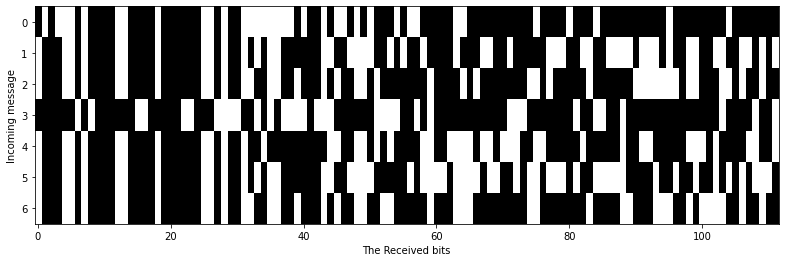

In [ ]:
import matplotlib.pyplot as plt   

def display_image(bits):
    	width, height = plt.figaspect(0.3)
    	fig = plt.figure(figsize=(width,height))
    	plt.imshow(bits, aspect='auto', cmap="gray")
    	plt.ylabel("Incoming message")
    	plt.xlabel("The Received bits")
    	plt.show()


codigo de prueba de la función anterior
bits = np.array([[0,1,1,0,1,0,1,1,0,0,0,1],[1,0,0,1,0,1,0,1,1,1,1,0],[0,1,1,0,1,1,1,1,0,0,1,1],[0,1,0,0,1,0,1,0,0,0,1,1]])
display_image(bits)






**Ejercicio 8:**

Para uno de los paquetes identificados como long squitter, decodificar a mano el mensaje recibido (alcanza solo con indicar el código ICAO en hexadecimal). Para ello, estudiar: http://mode-s.org/decode/adsb/introduction.html
Con el ICAO obtenido ver detalles del avion en http://www.airframes.org
  
##Informe
Entregue un informe  que explique cómo funciona ADS-B, responda a todo lo que se pregunta a lo largo de este tutorial, haciendo todo lo que se le indica a lo largo del mismo, mostrando resultados, gráficas y explicando en el informe lo hecho y los resultados. Finalice el informe con el código de la función detectar_preambulo, y datosAbits (que debe estar comentado) y en el informe se debe explicar cómo diseñaron dichos códigos  y por qué lo diseñaron de esa forma. Muestre la matriz de bits obtenida como imágen.
